# The numpy.random Package  ![Numpy Logo](  https://numpy.org/doc/stable/_static/numpylogo.svg)
***

## Setup

Firstly set up an environment by importing the required modules in order to examine this module and enable demonstrations of the concepts

In [1]:
#import required modules for demonstration
import numpy as np                #python module that specializes in arrays and random numbers
import matplotlib.pyplot as plt   #module to visualize finding s in charts, plots, etc
import math                       #not sure if needed - check later
import seaborn as sns             #makes plots prettier sits on top of pyplot
import matplotlib.image as img    #used to display images from file
from PIL import Image

%matplotlib inline

## Overview
There are an abundance of tutorials, documentation , jupyter notebooks, etc on the numpy.random package available on the web( some of the best are mentioned in the resouces section of this notebook below).  
This is not an attempt at a tutorial or an in-depth discussion of any of the features of the package( which is best left to the experts), moreover it is a quick overview of what is available in the package, how to use it,brief explanations of their purpose and where to go for further information.
<br>   
Numpy.org documentation pages state that:  
"Numpy’s random number routines produce pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions."[2]
<br>   
What exactly does this mean? 
<br>   
Lets take a look at what random numbers, pseudo random numbers, bit generators, generators, sequences, sampling and statistical distributions are.
<br>   



***

### Random Numbers
#### Intro  
Random numbers are useful for a variety of purposes, such as generating data encryption keys, simulating and modeling complex phenomena and for selecting random samples from larger data sets. They have also been used aesthetically, for example in literature and music, and are of course ever popular for games and gambling. When discussing single numbers, a random number is one that is drawn from a set of possible values, each of which is equally probable, i.e., a uniform distribution. When discussing a sequence of random numbers, each number drawn must be statistically independent of the others.*--from random.org rephrase and cite*   
There are two methods of obtaining a random number
#### True random
A true random number is one that is generated by a physical phenonamon such as radio static, etc *- expand*

#### Pseudo random

A pseudo random number is one that has been generated by an algorithm on a computer and as such, because algorithms are stochastic processes i.e. the outcome is predictable, they are not true random numbers hence the term pseudo. Pseudo random numbers are not used in cryptography for this very reason *--- verify and rephrase*

### Generators

Generators are computer algorithms to produce pseudo random numbers
#### Bit gen
A bit generator  will generate a bit *-explain*
#### Gen
A generator will use a bit generator to form a sequence of random numbers *-- clarify*

set up a random number generator and seed it for us in this notebook. Seeding is explained below in more detail toward the end of this notebook. Here it allows us to generate the same set of random numbers throughout the noteboook.

In [2]:
rng = np.random.default_rng(seed=1)

***

## “Simple random data” and “Permutations”
https://numpy.org/doc/stable/reference/random/generator.html#simple-random-data
### Simple random data
#### Integers
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers

This will draw random integers from a range of numbers(this functions draws them from the uniform distribution which is discussed below under distributions). For example a dice normally has with six faces with the dots on each face representing the numbers 1 to 6, if we were to generate a random number in the range one to six this would simulate a roll of the dice and if we were to do this 10 times we could simulate the outcome of 10 rolls of the dice.


In [3]:
#Roll the dice
Face = rng.integers(1,6,endpoint=True)
print("The dice face is showing ",Face)

The dice face is showing  3


In [4]:
#Roll the dice ten times
Rolls = rng.integers(1,6,size=10,endpoint=True)
print(Rolls)

[4 5 6 1 1 5 6 2 2 6]


#### Random
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random
#### Choice
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice

In [126]:
drawn = rng.choice(Deck,1)
print(drawn)
cardDrawn = "Images/"+ str(drawn[0].lower()).replace(" ","_")+".png"

['7 of Hearts']


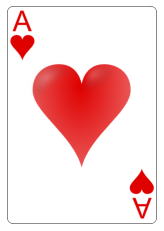

In [124]:
#image = img.imread("Images/jack_of_hearts2.png")
image = img.imread(cardDrawn)
plt.axis("off")
plt.imshow(image)
plt.show()

#### Bytes
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes

***   


### Permutations
#### shuffle
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle

The function shuffle will randomly rearrange the elements in an array, much like as in when shuffling a deck of playing cards.
Lets set up a deck of cards to demonstrate.

In [88]:
def resize_deck(Deck):
    resized =[]
    for card in Deck:
        cardImage = "Images/"+ str(card.lower()).replace(" ","_")+".png"
        img = Image.open(cardImage)
        rsize = img.resize((np.array(img.size)/5).astype(int))
        a = np.array(rsize)
        resized.append(a)
    for i in range(13,65,13):
        #print(i-13,i)
        display(Image.fromarray(np.hstack(resized[i-13:i])))


In [100]:
Suit = ["Spades","Diamonds","Hearts","Clubs"]
Card = [2,3,4,5,6,7,8,9,10,"Jack","Queen","King","Ace"]
Deck = []
for s in Suit:
    for c in Card:
        Deck.append(str(c) + " of " + s)
#take a copy
FreshDeck = Deck.copy()

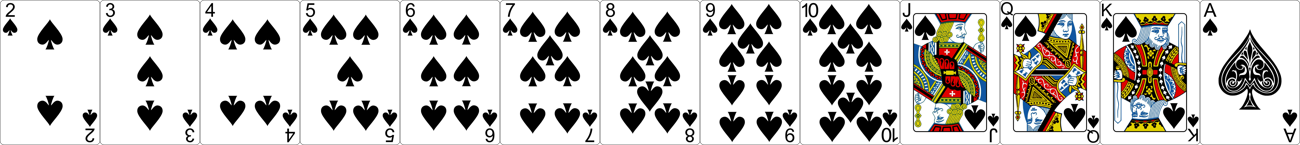

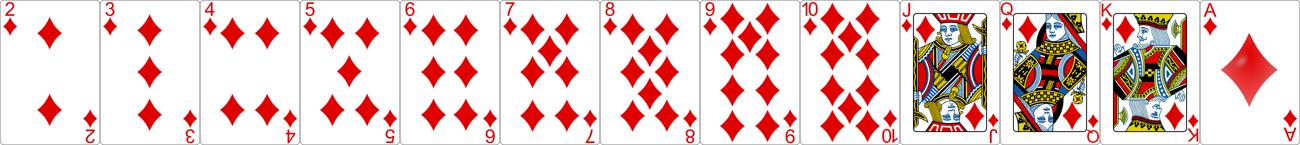

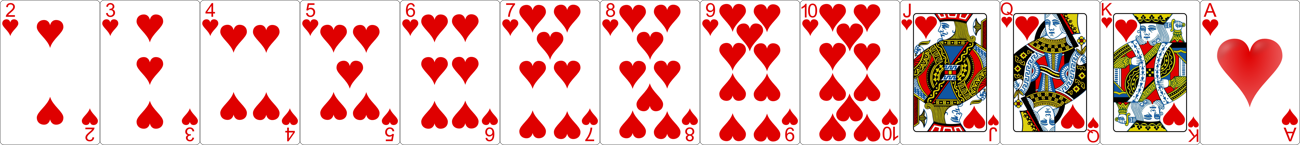

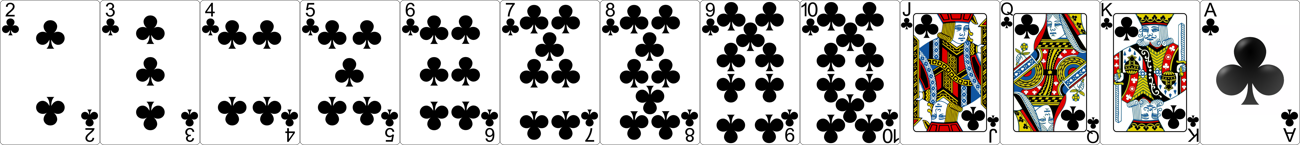

In [100]:
#resize the images for display purposes and output to screen
resize_deck(Deck)

In [101]:
# "Shuffle the Deck"
rng.shuffle(Deck)

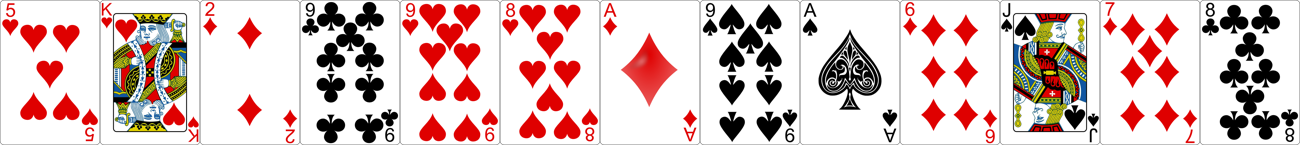

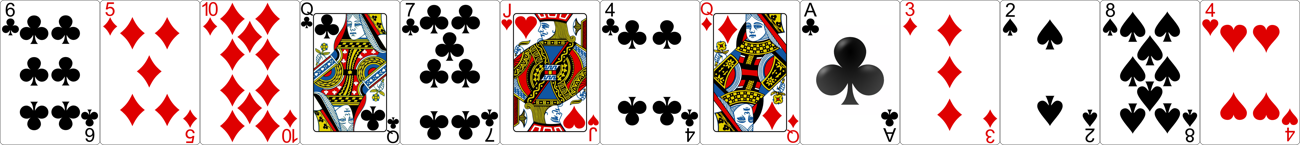

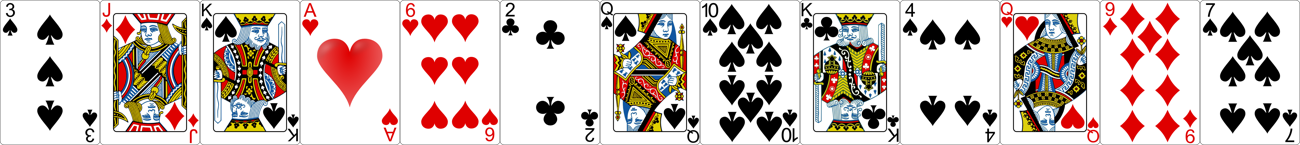

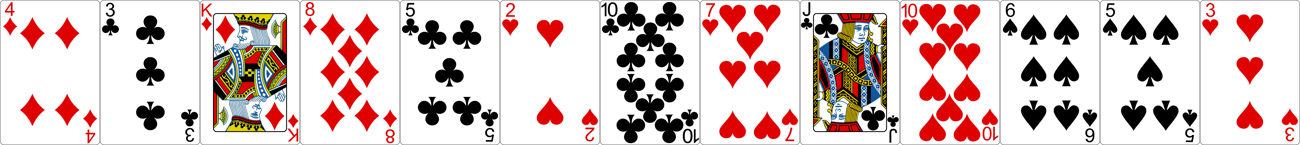

In [102]:
resize_deck(Deck)
#print(Deck)

#### permutation
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation

similar to shuffle this will permutate the elements in a given array or an array passed to it   
as an example pass the cards in the suit of spades

In [107]:
print(FreshDeck[0:13])
#resize_deck(FreshDeck[0:13]) need to modify resize function to cater for only one suit
print(rng.permutation(FreshDeck[0:13]))

['2 of Spades', '3 of Spades', '4 of Spades', '5 of Spades', '6 of Spades', '7 of Spades', '8 of Spades', '9 of Spades', '10 of Spades', 'Jack of Spades', 'Queen of Spades', 'King of Spades', 'Ace of Spades']
['Jack of Spades' '9 of Spades' '2 of Spades' 'Queen of Spades'
 '3 of Spades' 'King of Spades' '10 of Spades' '7 of Spades' '5 of Spades'
 '6 of Spades' '8 of Spades' '4 of Spades' 'Ace of Spades']


#### permuted
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permuted.html#numpy.random.Generator.permuted

similar to both shuffle and permutation this allows granularity on permuting or shuffling elements of an array along a chosen axis. It allows a copy to be taken or can be done in-place.   
Lets rearrange the Deck to represent the four suits as arrays of single suits within the deck.

 

In [110]:
NewDeck = np.array(FreshDeck).reshape(4,13)
print(NewDeck)

[['2 of Spades' '3 of Spades' '4 of Spades' '5 of Spades' '6 of Spades'
  '7 of Spades' '8 of Spades' '9 of Spades' '10 of Spades'
  'Jack of Spades' 'Queen of Spades' 'King of Spades' 'Ace of Spades']
 ['2 of Diamonds' '3 of Diamonds' '4 of Diamonds' '5 of Diamonds'
  '6 of Diamonds' '7 of Diamonds' '8 of Diamonds' '9 of Diamonds'
  '10 of Diamonds' 'Jack of Diamonds' 'Queen of Diamonds'
  'King of Diamonds' 'Ace of Diamonds']
 ['2 of Hearts' '3 of Hearts' '4 of Hearts' '5 of Hearts' '6 of Hearts'
  '7 of Hearts' '8 of Hearts' '9 of Hearts' '10 of Hearts'
  'Jack of Hearts' 'Queen of Hearts' 'King of Hearts' 'Ace of Hearts']
 ['2 of Clubs' '3 of Clubs' '4 of Clubs' '5 of Clubs' '6 of Clubs'
  '7 of Clubs' '8 of Clubs' '9 of Clubs' '10 of Clubs' 'Jack of Clubs'
  'Queen of Clubs' 'King of Clubs' 'Ace of Clubs']]


now lets rearrange the new deck so that the elements in each suit are no longer ranked by order of the card within suit

In [109]:
out = rng.permuted(NewDeck,axis=1)
print(out)

[['King of Hearts' 'Ace of Spades' 'Ace of Diamonds' '8 of Clubs'
  '6 of Diamonds' '8 of Hearts' 'Jack of Spades' '9 of Hearts'
  '9 of Clubs' '5 of Hearts' '2 of Diamonds' '9 of Spades'
  '7 of Diamonds']
 ['4 of Hearts' 'Queen of Diamonds' '5 of Diamonds' '8 of Spades'
  '10 of Diamonds' 'Jack of Hearts' '3 of Diamonds' 'Queen of Clubs'
  '7 of Clubs' '2 of Spades' 'Ace of Clubs' '6 of Clubs' '4 of Clubs']
 ['Queen of Spades' '6 of Hearts' 'Ace of Hearts' '3 of Spades'
  '2 of Clubs' 'Queen of Hearts' '10 of Spades' '4 of Spades'
  '7 of Spades' 'Jack of Diamonds' 'King of Clubs' '9 of Diamonds'
  'King of Spades']
 ['3 of Clubs' '5 of Clubs' '3 of Hearts' 'King of Diamonds'
  '10 of Hearts' '6 of Spades' '4 of Diamonds' '2 of Hearts'
  'Jack of Clubs' '8 of Diamonds' '7 of Hearts' '10 of Clubs'
  '5 of Spades']]


## Distributions
what is a statistical distribution

list the types, 

Explain use and purpose of five of these
Possibles - Uniform, Normal, Binomial, Pareto, ChiSquare

### Uniform
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform

A  uniform distribution is applicable where the possible outcomes are similar to each other. In the case of rolling a dice the odds of getting a number between one and six are 1:6 or 1/6 or one in six or .1667

|Number|Odds|
|-|-|
|1|.1667|
|2|.1667|
|3|.1667|
|4|.1667|
|5|.1667|
|6|.1667|

### Handmade trial

In [119]:
#try with a dice
Dice=[1,2,3,4,5,6]
#set a variable for multiple rolls
no_rolls = 1000
#single roll
roll = rng.choice(Dice,1)
print(roll)

[5]


In [ ]:
#multiple rolls
Rolls = rng.integers(1,6,size=no_rolls,endpoint=True)
#print(Rolls)

In [ ]:
values,counts = np.unique(Rolls,return_counts=True)

In [ ]:
print(values)

In [ ]:
print(counts)

In [ ]:
plt.plot(values,counts)
ex=np.full(8,166)
plt.plot(ex)
plt.show()

### Using uniform

In [ ]:
Rolls= rng.uniform(1,7,no_rolls)
print(Rolls[:10])

In [ ]:
expected=np.full(8,.166)
plt.hist(Rolls,bins=[1,2,3,4,5,6,7],density=True,align="left")
#plt.plot(counts,color="g")
plt.plot(expected,color="r")
plt.show()

The more rolls we sample the closer the bars get to the expected probability for each face of the dice --- need to figure how to show this as probabilities between 0 an 1 ie 16% = .16  NB - this is exactly what density=True does

In [ ]:
Rolls = rng.uniform(1,7,no_rolls*100)
plt.hist(Rolls,bins=[1,2,3,4,5,6,7],align='left',density=True)
plt.plot(expected,color="r")
plt.show()

***   

### Triangular or 2 dice
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.triangular.html#numpy.random.Generator.triangular

Two dice will give the range 2 to 12
with probabilities 0.027777778, 0.055555556, 0.083333333, 0.111111111, 0.138888889, 0.166666667, 0.138888889, 0.111111111, 0.083333333, 0.055555556, 0.027777778


In [117]:
values = [2,3,4,5,6,7,8,9,10,11,12]
probs = [0.027777778,0.055555556,0.083333333,0.111111111,0.138888889,0.166666667,0.138888889,0.111111111,0.083333333,0.055555556,0.027777778]

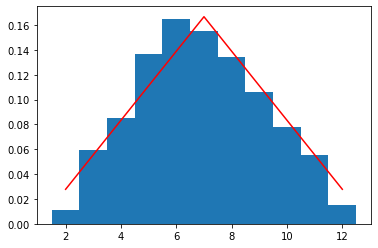

In [120]:
twoDice = rng.triangular(2,7,13,no_rolls)
plt.hist(twoDice,bins=[2,3,4,5,6,7,8,9,10,11,12,13],density=True,align='left')
plt.plot(values,probs,color="r")

### Binomial
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

### Binomial or many dice   

binomial parameters are (n,p,size)   
where n is the number of trials,p is the probability of the outcome and size is the number of tests

need to prove this to myself - what are generated numbers?

2,12 have a probability of .027 when two dice are thrown

In [ ]:
manyDice = rng.binomial(100,.027,10000)
print(manyDice)
print(manyDice.mean())  ##<----  this is the way to use it what is the possibility of getting a 1 or a 12 in 100 throws repeated 10000 times
#sum(rng.binomial(9, 0.1, 20000) == 0)/20000. ----still confused!!!
print(sum(manyDice == 2)/10000)
print(manyDice.min())
print(manyDice.max())
values,counts = np.unique(manyDice,return_counts=True)
print(counts,values)


In [ ]:
plt.hist(manyDice,bins=[2,3,4,5,6,7,8,9,10,11,12,13],density=True,align="left")
#sns.distplot(manyDice, hist=False, label='binomial')

### Normal
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal

### Three dice
can get between 3 and 18 from three dice
1 dice = 1/6 =.166
2 dice =1/6 * 1/6 = .027
3 dice =1/6 * 1/6 * 1/6 = .004

check this - tired now


In [ ]:
possibilities = list(range(3,19))

In [ ]:
print(possibilities)

In [ ]:
probabilities = [0.00462963,0.013888889,0.027777778,0.046296296,0.069444444,0.097222222,0.115740741,0.125,0.125,0.115740741,0.097222222,0.069444444,0.046296296,0.027777778,0.013888889,0.00462963]

In [ ]:
plt.plot(possibilities,probabilities,color="r")

Experiment with handmade "observations"

In [ ]:
theDice = [1,2,3,4,5,6]
rng.choice(theDice,1)

In [ ]:
#roll the three dice a ten thousand times
no_throws = 10000
no_of_dice = 3
outcomes = []
for throw in range(no_throws):
    sum_dice = 0
    for dice in range(no_of_dice):
        sum_dice += rng.choice(theDice,1)
    outcomes.append(sum_dice)
outcomes = np.array(outcomes)

In [ ]:
print("Mean ",outcomes.mean())
print("Min  ",outcomes.min())
print("Max  ",outcomes.max())
print("sDev ",outcomes.std())

In [ ]:
#plot the above
print(possibilities)
bins = possibilities.copy()
print(bins)
bins.append(19)
print(bins)

In [ ]:
plt.hist(outcomes,bins=bins,density=True,align='left')
plt.plot(possibilities,probabilities,color="r")

Look at normal distribution using the mean and std dev of the "observed"

In [ ]:
threeDice=rng.normal(10.54858,2.95,10000)


In [ ]:

print(threeDice)

In [ ]:
values,counts = np.unique(threeDice,return_counts=True)

In [ ]:
print(values,counts)

In [ ]:
plt.hist(threeDice,bins=bins,density=True,align='left')
plt.plot(possibilities,probabilities,color="r")
#plt.plot(values,counts,color="g")
plt.show()

In [ ]:
plt.plot(values,d3probs,color="r")

Rolling dice is a discrete distribution, while the normal distribution, AKA the Gaussian distribution, is continuous by definition. The distribution is technically binomial, which approximates the normal distribution as n gets large.
https://math.stackexchange.com/questions/1482813/is-rolling-a-dice-a-gauss-distribution

### Pareto
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.pareto.html#numpy.random.Generator.pareto

### ChiSquare
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.chisquare.html#numpy.random.Generator.chisquare

***  

## Seeds
Explain the use of seeds in generating pseudorandom numbers.

***  

## References

https://numpy.org/doc/stable/reference/random/generator.html   
[2] https://numpy.org/doc/stable/reference/random/index.html?highlight=random#quick-start

## Resources

https://www.random.org/randomness/

https://en.wikipedia.org/wiki/Randomness


https://code.google.com/archive/p/vector-playing-cards/downloads
<!---
![2_of_clubs](images/2_of_clubs.svg)
--->
<img src=images/2_of_clubs.svg width=72 height=96)>


In [ ]:
# Plot size.
plt.rcParams["figure.figsize"] = (10, 6)

# Pyplot style.
plt.style.use('seaborn')

In [ ]:
#deal 5 cards i.e. randomly select 5 cards from the deck
#this is 5 random samples from the deck it is not dealing from the deck
rng.choice(Deck,5)

In [ ]:
dist= rng.uniform(.5,4.5,no_rolls)
#print(dist)

In [ ]:
#count, bins, ignored = plt.hist(dist, 4, density=True)
#plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
#plt.show()
plt.hist(dist,4,density=True)

#chances of getting heart,club,spade or diamond are one in 4 or .25
prob=np.full(6,.25)
plt.plot(prob,color="r")
plt.show()

In [ ]:
#increase no_rolls
#no_rolls = 10000
#regen
Rolls = rng.integers(1,7,no_rolls)
#plt.plot(counts,color="g")
#plt.plot(expected,color="r")

expected = np.full(8,.166)
print(expected)
plt.hist(Rolls,bins=[1,2,3,4,5,6,7],density=True,align='left')
plt.plot(expected,color="r")
plt.show()

In [6]:
plt.show()